# Load Dataset

In [1]:
from set_math import *
from set_visualization import *
from datasets_init import *

sympy imported
pandas imported
numpy imported
scipy imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported
matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary
train data successfully imported as train
train data successfully imported as test
you may now begin


In [4]:
% matplotlib inline
% config InlineBackend.figure_formats = {'png', 'retina'}

In [152]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,4,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,4,60538815980,1,SHOES,8931
2,30,7,4,7410811099,1,PERSONAL CARE,4504
3,26,8,4,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,4,2006613744,2,PAINT AND ACCESSORIES,1017


* * * *
* * * *
* * * *

# Column Preprocessing

In [6]:
# 요일 numerical encoding

wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}

train["Weekday"] = train["Weekday"].apply(lambda x: wd[x]) # ... ?

In [7]:
print(train.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null int64
Upc                      642925 non-null object
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null object
dtypes: int64(4), object(3)
memory usage: 34.6+ MB
None 



# 각 Feature 설명 및 수치

- TripType = 타겟
- VisitNumber = ID (고객에 대한 고유한 ID)
- Weekday = 요일
- UPC = 구매한 아이템에 대한 고유 바코드
- ScanCount = UPC의 구매 수량 (음수일 때는 반품수량)
- DepartmentDescription = 대분류
- FinelineNumber = 소분류

In [8]:
print("rows :", train.shape[0],'\n' + "columns :", train.shape[1])
print("#n of VisitNumber :", train.VisitNumber.nunique(), '\n')
print("-- Unique Values --")
for i in train:
    print( i, ":", train[i].nunique())

rows : 647054 
columns : 7
#n of VisitNumber : 95674 

-- Unique Values --
TripType : 38
VisitNumber : 95674
Weekday : 7
Upc : 97714
ScanCount : 39
DepartmentDescription : 68
FinelineNumber : 5195


In [65]:
tripType = list(train['TripType'].unique())
tripType.sort()
tripType

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 999]

### 의문점

- ScanCount : 반품을 고려해야 하는가? 구매에 대한 분석이라면 ... 반품 성향까지는 고려하지 않아도 될 수도
- 결측치 : `Upc`, `DepartmentDescription`, `FinelineNumber` 각 1% 미만

In [9]:
# # ScanCount 반품 -> 0
# # NaN값 드랍
# train['ScanCount'] = train['ScanCount'].apply(lambda x: 0 if x < 0 else x)
# train.dropna(how='any', inplace=True)
# train.info()

* * * *
* * * *
* * * *

# 각 VisitNumber별 Department 출현 빈도

In [18]:
gb1 = train.groupby('VisitNumber')['DepartmentDescription'].value_counts()

# 각 TripType 별 DepartmentDescription 빈도

In [17]:
gb2 = train.groupby('TripType')['DepartmentDescription'].value_counts()

In [131]:
gb2[3]

DepartmentDescription
FINANCIAL SERVICES             5369
IMPULSE MERCHANDISE             804
LARGE HOUSEHOLD GOODS            76
DSD GROCERY                      59
PHARMACY OTC                     45
PERSONAL CARE                    40
MENS WEAR                        37
BEAUTY                           24
CANDY, TOBACCO, COOKIES          24
PRODUCE                          22
AUTOMOTIVE                       20
CELEBRATION                      17
SPORTING GOODS                   16
ELECTRONICS                      15
HOME MANAGEMENT                  14
DAIRY                            13
SERVICE DELI                     13
COOK AND DINE                    12
OFFICE SUPPLIES                  12
GROCERY DRY GOODS                11
HARDWARE                         11
INFANT CONSUMABLE HARDLINES      11
PETS AND SUPPLIES                11
JEWELRY AND SUNGLASSES           10
MEDIA AND GAMING                 10
BOYS WEAR                         9
LAWN AND GARDEN                   9
LIQUOR

In [99]:
pt = train.pivot_table(values='ScanCount', index='TripType', columns='DepartmentDescription', fill_value=0, aggfunc=np.sum)

In [124]:
pt.loc[3]

DepartmentDescription
1-HR PHOTO                       2
ACCESSORIES                      2
AUTOMOTIVE                      22
BAKERY                           5
BATH AND SHOWER                  8
BEAUTY                          24
BEDDING                          4
BOOKS AND MAGAZINES              4
BOYS WEAR                        9
BRAS & SHAPEWEAR                 0
CAMERAS AND SUPPLIES             5
CANDY, TOBACCO, COOKIES         25
CELEBRATION                     17
COMM BREAD                       4
CONCEPT STORES                   2
COOK AND DINE                   10
DAIRY                           11
DSD GROCERY                     56
ELECTRONICS                     14
FABRICS AND CRAFTS               8
FINANCIAL SERVICES            5829
FROZEN FOODS                     7
FURNITURE                        1
GIRLS WEAR, 4-6X  AND 7-14       2
GROCERY DRY GOODS               12
HARDWARE                        11
HEALTH AND BEAUTY AIDS           0
HOME DECOR                       

DepartmentDescription
FINANCIAL SERVICES       5369
IMPULSE MERCHANDISE       804
LARGE HOUSEHOLD GOODS      76
DSD GROCERY                59
PHARMACY OTC               45
Name: DepartmentDescription, dtype: int64

In [69]:
tripType = list(train['TripType'].unique())
tripType.sort()

In [74]:
for i in tripType:
    print(i, '\n', gb2[i],'\n')

3 
 DepartmentDescription
FINANCIAL SERVICES             5369
IMPULSE MERCHANDISE             804
LARGE HOUSEHOLD GOODS            76
DSD GROCERY                      59
PHARMACY OTC                     45
PERSONAL CARE                    40
MENS WEAR                        37
BEAUTY                           24
CANDY, TOBACCO, COOKIES          24
PRODUCE                          22
AUTOMOTIVE                       20
CELEBRATION                      17
SPORTING GOODS                   16
ELECTRONICS                      15
HOME MANAGEMENT                  14
DAIRY                            13
SERVICE DELI                     13
COOK AND DINE                    12
OFFICE SUPPLIES                  12
GROCERY DRY GOODS                11
HARDWARE                         11
INFANT CONSUMABLE HARDLINES      11
PETS AND SUPPLIES                11
JEWELRY AND SUNGLASSES           10
MEDIA AND GAMING                 10
BOYS WEAR                         9
LAWN AND GARDEN                   9
LI

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/multi.py:848: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


In [92]:
basket = train.pivot_table(values='ScanCount', columns="TripType", index="DepartmentDescription")

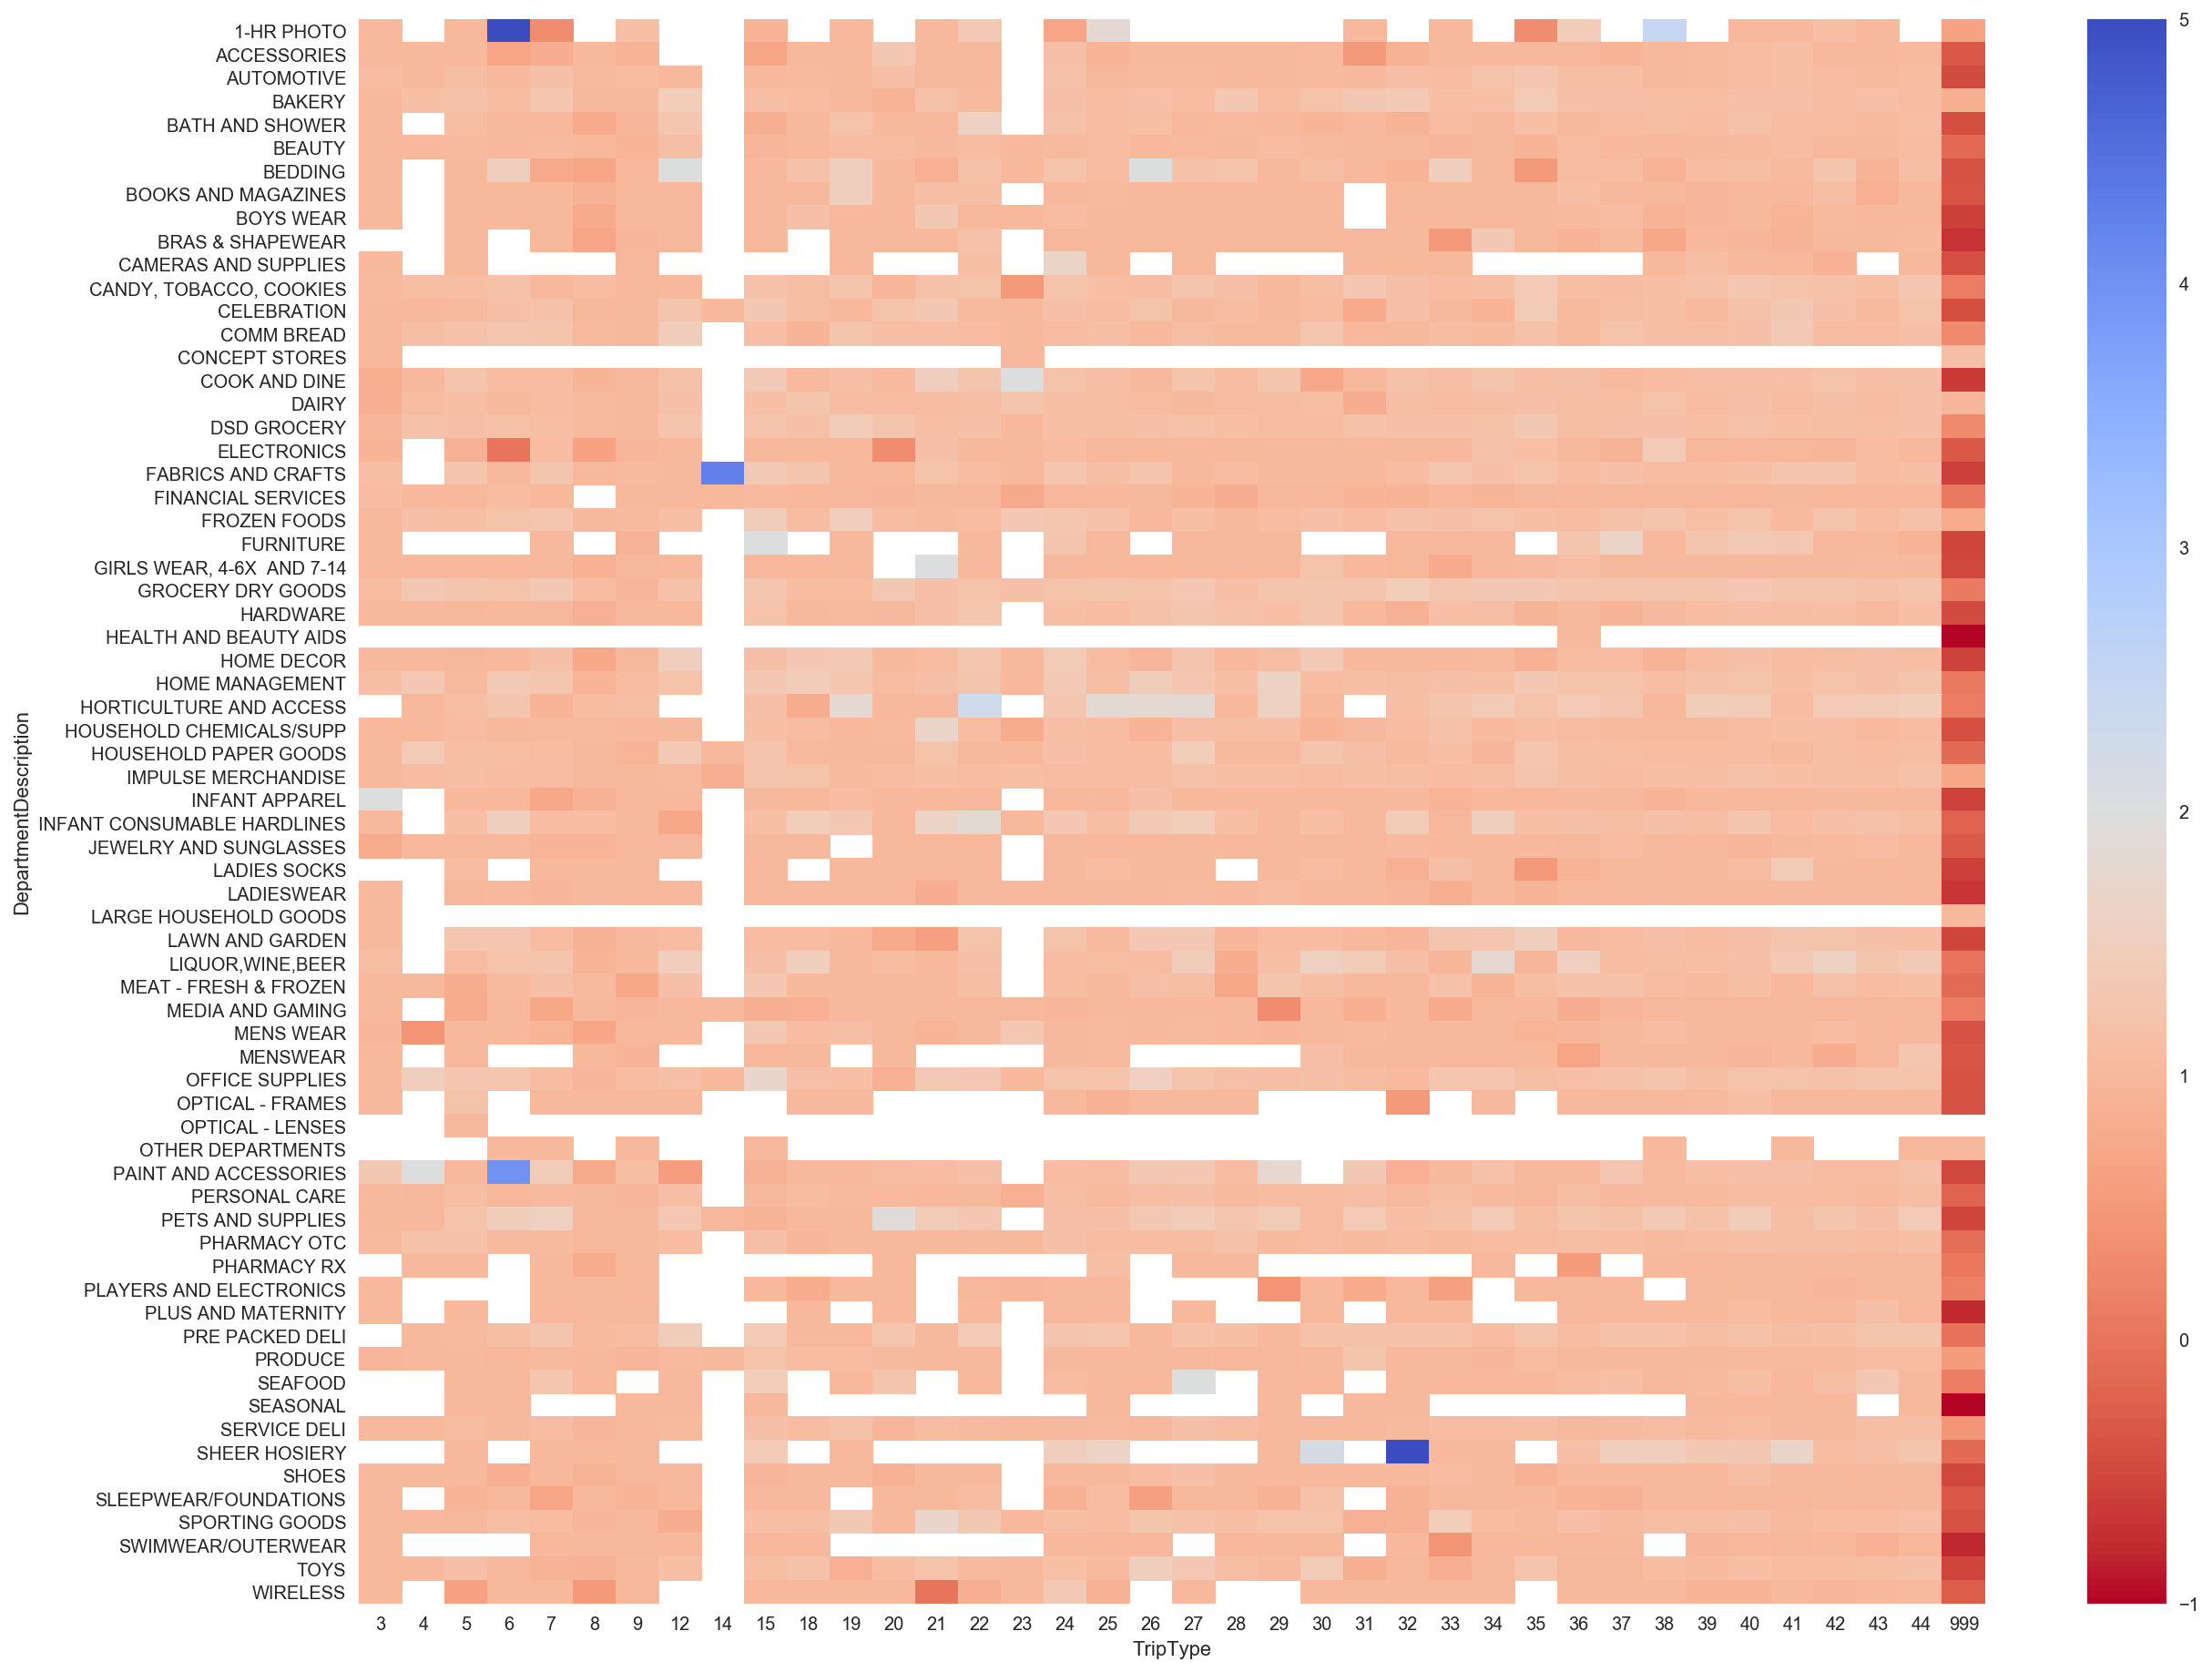

In [93]:
plt.figure(figsize=(20, 16))
sns.heatmap(basket, cmap="coolwarm_r", cbar=True)
plt.show()

연관성을 이런 식으로 추출하기는 쉽지 않다

# NaN의 분포

### UPC 조금 더 파고들기

In [12]:
train['Upc'] = train['Upc'].astype('float64')

In [15]:
train[(train['Upc'] < 100000) & (train['Upc'] > 10000)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
880,38,385,4,94011.0,2,PRODUCE,5504
5145,7,1928,4,51376.0,1,DSD GROCERY,2353
8243,8,2891,4,51376.0,1,DSD GROCERY,2353
11346,8,3828,4,51376.0,1,DSD GROCERY,2353
13741,39,4521,4,80255.0,1,PETS AND SUPPLIES,7905
16576,32,5373,4,51376.0,1,DSD GROCERY,2353
19714,40,6159,4,80255.0,2,PETS AND SUPPLIES,7905
19715,40,6159,4,80255.0,5,PETS AND SUPPLIES,7905
19716,40,6159,4,80255.0,1,PETS AND SUPPLIES,7905
21214,39,6744,5,94011.0,1,PRODUCE,5504


### 의문
동일한 UPC인데, 왜 ScanCount가 multiple 값으로 찍히지 않는지

# Regrouping Department Description

In [141]:
dd = list(train['DepartmentDescription'].unique())

In [142]:
dd = pd.DataFrame({'DepartmentDescription': dd})

In [150]:
dd.loc[30:38]

,DepartmentDescription
30,CELEBRATION
31,HARDWARE
32,BEAUTY
33,AUTOMOTIVE
34,BOOKS AND MAGAZINES
35,SEAFOOD
36,OFFICE SUPPLIES
37,LAWN AND GARDEN
38,SHEER HOSIERY


In [149]:
dd['DepartmentDescription']

0              FINANCIAL SERVICES
1                           SHOES
2                   PERSONAL CARE
3           PAINT AND ACCESSORIES
4                     DSD GROCERY
5           MEAT - FRESH & FROZEN
6                           DAIRY
7               PETS AND SUPPLIES
8        HOUSEHOLD CHEMICALS/SUPP
9                             NaN
10            IMPULSE MERCHANDISE
11                        PRODUCE
12        CANDY, TOBACCO, COOKIES
13              GROCERY DRY GOODS
14                      BOYS WEAR
15             FABRICS AND CRAFTS
16         JEWELRY AND SUNGLASSES
17                      MENS WEAR
18                    ACCESSORIES
19                HOME MANAGEMENT
20                   FROZEN FOODS
21                   SERVICE DELI
22    INFANT CONSUMABLE HARDLINES
23                PRE PACKED DELI
24                  COOK AND DINE
25                   PHARMACY OTC
26                     LADIESWEAR
27                     COMM BREAD
28                         BAKERY
29          HO